In [1]:
'''
Date: 2022.07.29
Title: 데이터 분석 종합
By: Kang Jin Seong
'''
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# 중고나라 데이터셋 살펴보기
df = pd.read_csv("C:/Users/USER/DataAnalysis_jupyter/used_mobile_phone.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [3]:
'''
개별 피처 탐색하기
 - data 피처 탐색
'''

# create_data로부터 '월'을 의미하는 month 정보를 피처로 추출합니다.
df['month'] = df['create_date'].apply(lambda x: x[:7])

# 월별 거래 횟수를 계산하여 출력합니다.
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

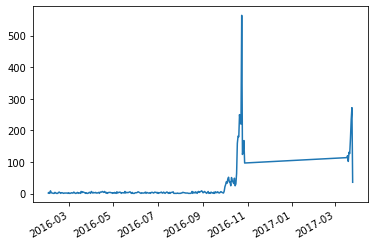

In [4]:
# 일별 거래 횟수를 계산하여 그래프로 출력합니다.(시계열 그래프)
df_day = pd.to_datetime(df['create_date'].apply(lambda x: x[:10])).value_counts()
df_day.plot()
plt.show()

<AxesSubplot:>

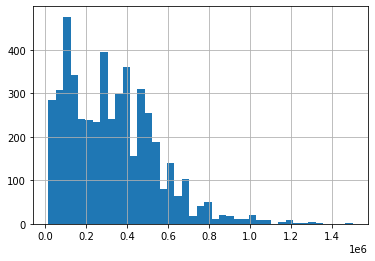

In [5]:
# 가격 피처 탐색
# 가격의 분포를 그래프로 탐색합니다.
df['price'].hist(bins = 'auto')

In [6]:
# 핸드폰 기종(phone_model)별 가격의 평균과 표준편차를 계산합니다.
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x: np.mean(x))
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x: np.std(x))

<AxesSubplot:>

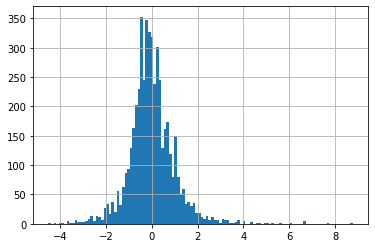

In [7]:
# 이를 바탕으로 모든 데이터의 z-score를 계산합니다. 이는 해당 데이터의 가격이 기종별 평균에 비해 어느정도로 높거나
# 낮은지를 알 수 있게 하는 점수입니다.
df_price_model_z_score = (df['price'] - df_price_model_mean) / df_price_model_std
df_price_model_z_score.hist(bins = 'auto')

# price 피처의 분포는 정규분포에 가깝다

<AxesSubplot:>

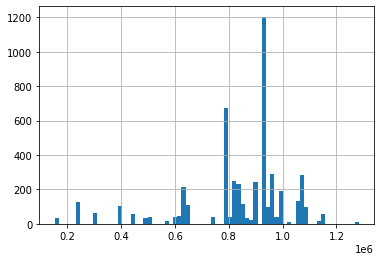

In [8]:
# 출고가 피처 탐색
# factory_price 피처의 분포를 탐색합니다.
df['factory_price'].hist(bins = 'auto')

<AxesSubplot:xlabel='factory_price', ylabel='price'>

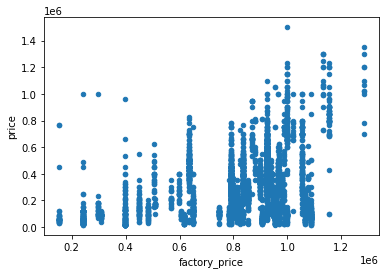

In [9]:
# factory_price 와 price 피처를 scatter plot으로 출력하여, 상관관계를 살펴봅니다.
df.plot.scatter(x = 'factory_price', y = 'price')

#이를 통해 factory_price는 중고 휴대폰 판매 가격에 꽤 중요한 영향을 미칠 것이라고 추정

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x16be3038ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x16be304c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16be30387f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16be304c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x16be304c910>],
 'means': []}

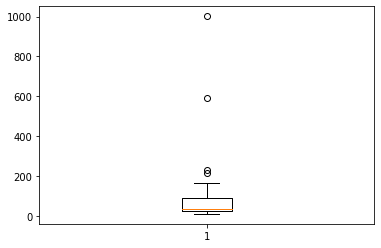

In [10]:
# 핸드폰 모델 피처 탐색
# 기종별 총 거래 데이터 개수를 집계합니다.
model_counts = df['phone_model'].value_counts()
print(model_counts.describe())

# 기종별 총 거래 데이터 개수를 상자 그림으로 살펴봅시다.
plt.boxplot(model_counts)

In [11]:
'''Random forest regressor를 이용한 가격 예측'''
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,month
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


In [12]:
# Random forest 모델 학습
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 데이터를 학습/테스트용 데이터로 분리합니다.
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'month']]
df = pd.get_dummies(df, columns = ['phone_model', 'maker', 'month'])    #get_dummies: 데이터 전처리, 가변수 만들기
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 랜덤 포레스트 모델을 학습합니다.
forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 10627549180.137, test: 13858331339.143
R^2 train: 0.781, test: 0.683


[('factory_price', 0.4065721800984249),
 ('maker_apple', 0.29725421882041453),
 ('phone_model_galaxy s3 3g 8gb', 0.02250330890608401),
 ('phone_model_iphone se 64gb', 0.021460305999130912),
 ('price_index', 0.020724064663738776),
 ('phone_model_galaxy s4 32gb', 0.017175360535997233),
 ('maker_samsung', 0.014952329163302707),
 ('month_2017-03', 0.014804239087614359),
 ('phone_model_galaxy s6 32gb', 0.012615834897009959),
 ('month_2016-05', 0.010927448993283424)]

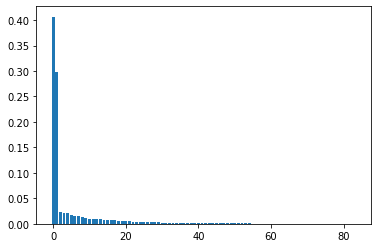

In [13]:
# 피처 중요도 분석
# 학습한 모델의 피처 중요도를 그래프로 살펴봅니다.
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

# 학습한 모델의 피처 중요도를 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key = lambda tup: tup[1], reverse = True)[:10]

In [14]:
# month 피처 중, 영향력이 높은 순으로 정렬하여 출력합니다.
for sorted_feature in sorted(feature, key = lambda tup: tup[1], reverse = True):
    if 'month' in sorted_feature[0]:
        print(sorted_feature)

('month_2017-03', 0.014804239087614359)
('month_2016-05', 0.010927448993283424)
('month_2016-09', 0.008231210484190113)
('month_2016-04', 0.0075433418388318645)
('month_2016-10', 0.006456328072185233)
('month_2016-06', 0.004418530093984227)
('month_2016-08', 0.00367674634359447)
('month_2016-07', 0.0027997282143508496)
('month_2016-03', 0.0023875575642719363)
('month_2016-02', 0.0010625851513487736)


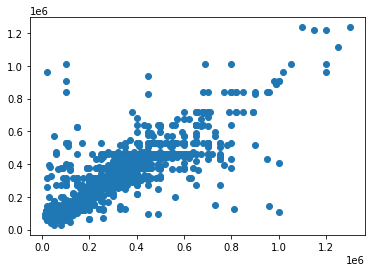

In [15]:
plt.scatter(y_test.values, y_test_pred)

In [16]:
'''Step2. 피처 엔지니어링 예측 '''
# 기존 feature의 가공

# 데이터를 다시 불러옵니다.
df = pd.read_csv("C:/Users/USER/DataAnalysis_jupyter/used_mobile_phone.csv")

In [17]:
# create_date로 시간점수 생성하기
from datetime import datetime
import time

# create_date 피처를 수치적으로 계산하기 위해, unixtime으로 변환하는 함수를 정의합니다.
# (unixtime: 시간을 정수로 표현 값이 클수록 최근에 가까움)
def date_to_unixtime(date_str):
    timestamp = time.mktime(datetime.strptime(date_str, '%Y-%m-%d').timetuple())
    return timestamp

# create_date 피처를 '현재와 얼마나 가까운 데이터인 지' 판단하기 위한 점수를 생성합니다. 먼저 unixtime으로 데이터를 변환합니다.
df['create_unixtime'] = df['create_date'].apply(lambda x: date_to_unixtime(x[:10]))
print(df['create_unixtime'][:10])

0    1.489849e+09
1    1.477408e+09
2    1.477321e+09
3    1.490195e+09
4    1.460300e+09
5    1.490108e+09
6    1.490195e+09
7    1.475766e+09
8    1.490368e+09
9    1.458659e+09
Name: create_unixtime, dtype: float64


In [18]:
# 변환된 unixtime에 min-max 스케일링을 적용합니다.
df['create_time_score'] = (df['create_unixtime'] - df['create_unixtime'].min()) / \
                          (df['create_unixtime'].max() - df['create_unixtime'].min())
df[['create_date', 'create_unixtime', 'create_time_score']].head()

,create_date,create_unixtime,create_time_score
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468


In [19]:
'''phone_model 피처 분리'''

#phone_model 피처에서 저장 용량(phone_model_storage) 피처를 추출합니다.
df['phone_model_storage'] = df['phone_model'].apply(lambda x: x.split(" ")[-1])

# phone_model 피처에서 기종 세부명 (phone_model_detail) 피처를 추출합니다.
df['phone_model_detail'] = df['phone_model'].apply(lambda x: " ".join(x.split(" ")[:-1]))
df[['phone_model_storage', 'phone_model_detail']].head()
# df.head()

,phone_model_storage,phone_model_detail
0,64gb,iphone 6
1,32gb,galaxy s6 edge
2,32gb,galaxy s6
3,32gb,lg g5
4,32gb,lg u


{'whiskers': [<matplotlib.lines.Line2D at 0x16be4b89820>,
 'caps': [<matplotlib.lines.Line2D at 0x16be4b89dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16be4b89550>,
 'medians': [<matplotlib.lines.Line2D at 0x16be4b983a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x16be4b98670>,
 'means': []}

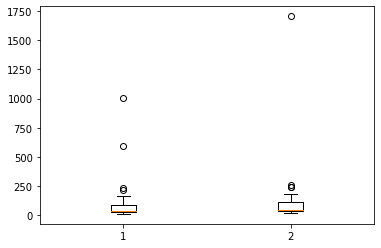

In [20]:
# 피처 분리 이전과 이후의 분포를 상자 그림으로 비교

# phone_model 피처의 기종별 거래 데이터 개수를 집계합니다.
model_counts = df['phone_model'].value_counts()

# phone_model_detail 피처의 기종별 거래 데이터 개수를 집계합니다.
model_detail_counts = df['phone_model_detail'].value_counts()
data = [model_counts, model_detail_counts]
# 두 피처 간의 기종별 거래 데이터 개수를 비교합니다.
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(1,1,1)
ax.boxplot(data)

In [21]:
'''phone_model 관련 딕셔너리 생성'''

# 기종명 + 용량으로 출고가를 찾기 위한 딕셔너리를 생성합니다.
model_to_factory_price_dict = {}
for index, row in df.iterrows():
    model_concat = (row['phone_model_detail'], row['phone_model_storage'])
    if model_concat in model_to_factory_price_dict:
        pass
    else:
        model_to_factory_price_dict[model_concat] = row['factory_price']
print(str(model_to_factory_price_dict)[:40], "...")

{('iphone 6', '64gb'): 924000, ('galaxy  ...


-1.3966616903783375
1.666982156397844


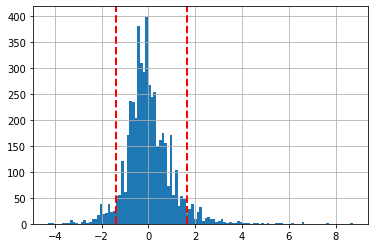

In [22]:
'''감성분석으로 물품의 상태 분류하기'''

# 감성분류의 정답 데이터셋 생성

# 거래 가격(price)의 z-score를 계산합니다. 이는 해당 데이터의 가격이 기종의 평균에 비해 어느정도로 높거나 낮은지를 알 수 있게 하는 점수
df['price_by_group'] = df.groupby('phone_model_detail')['price'].transform(lambda x: (x-x.mean()) / x.std())

# 거래 가격의 z-score(price_by_group)의 분포를 그래프로 출력합니다.
ax = df['price_by_group'].hist(bins = 'auto')

# z-score(price_by_group) 기준으로 하위 5%, 상위 5%에 해당하는 점수를 lower_bound, upper_bound 라고 지정합니다.
lower_bound = df['price_by_group'].quantile(0.05)
upper_bound = df['price_by_group'].quantile(0.95)

# lower_bound, upper_bound 그래프에 추가합니다.
ax.axvline(x = lower_bound, color = 'r', linestyle = 'dashed', linewidth = 2)
ax.axvline(x = upper_bound, color = 'r', linestyle = 'dashed', linewidth = 2)

# lower_bound, upper_bound를 출력합니다.
print(lower_bound)
print(upper_bound)

In [23]:
# lower_bound 보다 낲으면 0, upper_bound 보다 높으면 2, 그 중간이면 1로 가격의 상태를 분류하는 함수를 정의합니다.
def get_price_level(price, lower, upper):
    if price <= lower:
        return "0"
    elif price >= upper:
        return "2"
    else:
        return "1"
    
# lower_bound 보다 낲으면 0, upper_bound 보다 높으면 2, 그 중간이면 1로 가격의 상태를 분류합니다.
df['price_lower'] = df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.05))
df['price_upper'] = df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.95))
df['price_level'] = df.apply(lambda row: get_price_level(row['price'], row['price_lower'], row['price_upper']), axis = 1)
df[['price', 'price_lower', 'price_upper', 'price_level', 'text']].head()

,price,price_lower,price_upper,price_level,text
0,550000.0,180000.0,680000.0,1,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...
1,380000.0,180000.0,414000.0,1,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...
2,300000.0,150000.0,349000.0,1,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...
3,290000.0,100000.0,500000.0,1,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...
4,280000.0,18000.0,400000.0,1,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...


In [24]:
'''텍스트 전처리'''
import pickle
import re

# 중고나라 불용어 사전을 불러옵니다.
with open("C:/Users/USER/DataAnalysis_jupyter/used_mobile_phone_stopwords.pkl", 'rb') as f:
    stopwords = pickle.load(f)
    
# 불용어 사전에 등록된 단어 10개를 출력합니다.
print(stopwords[:10])

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시']


In [25]:
'''형태소 단위로 추출'''
from konlpy.tag import Okt

# '+'를 제외한 특수 문자를 제거하고, 숫자형태의 문자를 제거합니다.
def text_cleaning(text):
    text = "".join(c for c in text if c.isalnum() or c in '+, ')
    text = "".join([i for i in text if not i.isdigit()])
    return text

# 불용어에 등장하지 않는 형태소만을 추출하여 반환하는 함수입니다.
def get_pos(x):
    tagger = Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] not in stopwords]

# 위 함수들을 적용한 형태소 추출을 테스트 합니다.
df['text'] = df['text'].apply(lambda x: text_cleaning(x))
result = get_pos(df['text'][0])
print(result)

['+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '리퍼', '기간', '만료', '되어서', '징', '하게', '되었습니다', '상태', '초', 'a', '급', '스', '없습니다', '+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '리퍼', '기간', '만료', '되어서', '징', '하게', '되었습니다', '상태', '초', 'a', '급', '스', '없습니다', '징', '애플', '라이트', '홈', '버튼', '링', '카메라', '링', '볼륨', '버튼', '슬립', '버튼', '검금', '심플', '튀지', '않게', '이쁘게', '했구요', '유심', '꽂고', '바로', '사용', '하시면', '됩니다', '사람', '이냐', '자주', '물어보고', '실제', '더욱', '이쁩니다', '밤', '영롱하게', '맥북', '뒷', '사과', '로고', '비춰지고', '요전', '넘어가기', '위해', '합니다', '가능합니다', '박스', '어머니', '버리시고', '이어폰', '충전기', '정품', '드립니다', '직거래', '우선', '순', '위로', '정', '싶으시면', '선', '입금', '택배', '발송', '해드리겠습니다', '믿으시면', '직거래', '하시길', '추천', '해요', '안전', '합니다', '서울시', '강남구', '역삼동', '차병원', '사거리', '근처', '가격']


In [26]:
'''빈출 형태소 2500개 선정'''
from collections import Counter

# get_pos 함수를 모든 텍스트 데이터에 적용하여 형태소 말뭉치를 추출합니다.
corpus = sum(df['text'].apply(lambda x: get_pos(x)).tolist(), [])

# 추출된 형태소 말뭉치에서 가장 많이 등장한 형태소 2500개를 추출합니다.
counter = Counter(corpus)
common_words = [key for key, _ in counter.most_common(2500)]
common_words

['입니다',
 '직거래',
 's',
 '합니다',
 '택배',
 '사용',
 '급',
 '상태',
 '팝니다',
 '가능합니다',
 '정상',
 '사진',
 '가격',
 '+',
 '케이스',
 'a',
 '주세요',
 '해지',
 '삭제',
 '제품',
 '있습니다',
 '박스',
 '가능',
 '직접',
 '액정',
 '배터리',
 '성품',
 '필름',
 '리퍼',
 '충전기',
 '없습니다',
 '풀',
 '개통',
 '유심',
 '즈',
 '안전',
 '스',
 '하기',
 '신청',
 '드립니다',
 '통신사',
 '구입',
 '약정',
 '이어폰',
 '공기',
 '새',
 '기변',
 '포함',
 '모델',
 '선택',
 '됩니다',
 '확인',
 '기간',
 '기스',
 '그레이',
 '찍힘',
 '방법',
 '바로',
 '할인',
 '제',
 '시기',
 '스페이스',
 '희망',
 '번호',
 '중고나라',
 '본체',
 '같이',
 '생활',
 '잘',
 '무',
 '퀵',
 '글',
 '된',
 '않을',
 '공식',
 '앱',
 '확정',
 '기능',
 '다운',
 '양',
 '호환',
 '케이블',
 '받기',
 '미',
 '이메일',
 '작성',
 '부분',
 '금지',
 '될수',
 '식아이디',
 '허위',
 '임의',
 '통보',
 '채우지',
 '핸드폰',
 '편한',
 '전혀',
 '충전',
 '내용',
 '연락처',
 '단말기',
 '부산',
 '대구',
 '미사',
 '정품',
 '중고',
 '문제',
 '없이',
 '이상',
 '보호',
 '방문',
 '없는',
 '외관',
 '외',
 '인천',
 '깨끗합니다',
 'x',
 '초기',
 '하나',
 '참고',
 '이구',
 '요금',
 '개월',
 '이나',
 '사이트',
 '팔아요',
 '하시면',
 '했습니다',
 '동',
 '카페',
 '보내',
 '카톡',
 '블로그',
 '링크',
 '싸이',
 '강퇴',
 '삼성',
 '거치',
 '있는',
 '호선'

In [27]:
''' 전처리 완료된 텍스트 데이터를 학습 데이터셋의 형태로 변환'''
# TF-IDF 벡터 생성
df['price_level'].value_counts()

1    4296
0     334
2     321
Name: price_level, dtype: int64

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 빈출 형태소를 제외한 모든 형태소를 제거하는 함수를 정의합니다.
def get_common_pos(x):
    tagger =Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] in common_words]

# 1:3:1 비율로 랜덤 샘플링을 수행합니다.
negative_random = df[df['price_level'] == '0'].sample(321, random_state = 30)
neutral_random = df[df['price_level'] == '1'].sample(321*3, random_state = 30)
positive_random = df[df['price_level'] == '2'].sample(321, random_state = 30)

# 샘플링 완료된 데이터셋을 정의합니다.
df_sample = negative_random.append(neutral_random).append(positive_random)

# TF-IDF를 수행하여 피처를 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_common_pos(x))
X = index_vectorizer.fit_transform(df_sample['text'].tolist())
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

# 감성 분류를 위한 학습 데이터셋을 정의합니다.
y = df_sample['price_level']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 30)
print(x_train.shape)
print(x_test.shape)

(1284, 2476)
(321, 2476)


In [29]:
'''상품 상태 분류하기'''
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# 비선형 SVM 분류 모델을 학습하고 평가합니다.
svm = SVC(kernel = 'rbf', C = 10.0, random_state = 0, gamma = 0.10)
svm.fit(x_train, y_train)
y_pred_ksvc = svm.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_ksvc))

Accuracy: 0.77


In [30]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_ksvc)
print(confmat)

[[ 30  28   4]
 [ 10 181  10]
 [  2  21  35]]


MSE train: 4776115406.436, test: 10947166476.478
R^2 train: 0.902, test: 0.750


[('maker_apple', 0.25343389107285536),
 ('factory_price', 0.25223780017716435),
 ('create_time_score', 0.11616711463606016),
 ('phone_model_storage_16gb', 0.060668819501229154),
 ('product_status_2', 0.047817599092261305),
 ('phone_model_detail_galaxy s7 edge', 0.028961733545878755),
 ('phone_model_storage_64gb', 0.026231556745603287),
 ('phone_model_detail_galaxy note5', 0.024920017321137466),
 ('phone_model_detail_galaxy s7', 0.02295184281066625),
 ('product_status_0', 0.02157651265930106)]

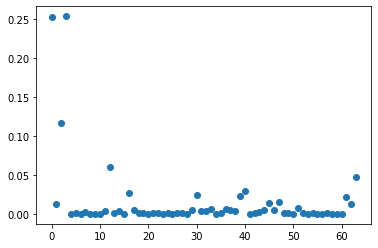

In [31]:
'''중고폰 거래가 예측'''
# Random forest regressor 재학습

# text 피처로부터 '상품 상태 피처(product_status)'를 생성합니다.
X = index_vectorizer.transform(df['text'].tolist())
X = tfidf_vectorizer.transform(X)
df['product_status'] = pd.Series(svm.predict(X))

# 랜덤 포레스트 모델 학습을 위한 데이터를 준비합니다.
df = df[['price', 'factory_price', 'maker', 'price_index', 'create_time_score', 'phone_model_storage',
        'phone_model_detail', 'product_status']]
df = pd.get_dummies(df, columns = ['maker', 'phone_model_storage', 'phone_model_detail', 'product_status'])

# 학습/테스트 데이터를 분리합니다.
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 랜덤 포레스트 모델을 학습하고 평가합니다.
forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# 피처 중요도 plot을 출력합니다.
importances = forest.feature_importances_
plt.plot(importances, "o")

# 피처 중요도를 print로 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key = lambda tup: tup[1], reverse = True)[:10]

In [32]:
'''feature-index 관련 딕셔너리 생성'''

# 프로그램에서 입력값에 대한 피처를 찾기 위한 딕셔너리를 생성합니다.
col_to_index_dict = {}

for idx, col in enumerate(df.columns[1:]):
    col_to_index_dict[col] = idx
    
print(str(col_to_index_dict)[:40], "...")

{'factory_price': 0, 'price_index': 1, ' ...


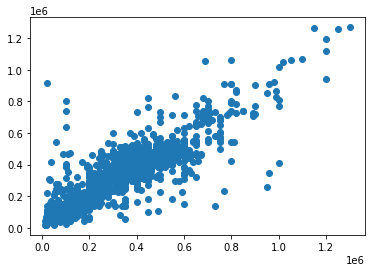

In [33]:
'''예측 결과 Scatter plot'''

# 테스트 데이터의 y의 값과 예측된 y값을 scatter plot을 활용하여 상관관계를 살펴봅시다.
plt.scatter(y_test.values, y_test_pred)

In [40]:
'''최적의 모델 파라미터 찾기'''

from sklearn.model_selection import RandomizedSearchCV

# Randomized Search로 찾아낼 파라미터 후보군을 각각 리스트로 선정합니다.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

# RandomizedSearchCV 오브젝트를 생성하여 모델을 정의합니다.
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'bootstrap': bootstrap}

forest = RandomForestRegressor()

optimal_forest = RandomizedSearchCV(estimator = forest,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   cv = 3,
                                   verbose = 2,
                                   random_state = 42,
                                   n_jobs = -1)

# RandomizedSearchCV 모델을 학습합니다.
X = df.loc[:, df.columns != 'price']
y = df['price']
optimal_forest.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
''' 최적 파라미터 출력'''
# 앞서 선정한 파라미터 후보군 중에서 가장 좋은 결과를 보인 파라미터와 조합을 출력합니다.
optimal_forest.best_params_

{'n_estimators': 2000,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

MSE train: 8808363282.151, test: 7645657609.863
R^2 train: 0.818, test: 0.825


[('factory_price', 0.2964707701493334),
 ('maker_apple', 0.27561463802689906),
 ('phone_model_storage_16gb', 0.07214582560362141),
 ('create_time_score', 0.06578651337699223),
 ('product_status_2', 0.0626326799052803),
 ('phone_model_detail_galaxy s7 edge', 0.02707710136679044),
 ('phone_model_detail_iphone 6', 0.025025576393289714),
 ('product_status_0', 0.024645879632330624),
 ('phone_model_detail_galaxy s4', 0.020530253290288365),
 ('product_status_1', 0.013607149821867214)]

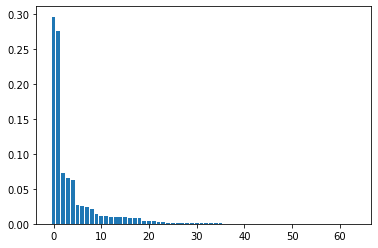

In [42]:
''' 최적 모델 학습 결과'''

# 최적의 파라미터를 적용한 모델로 중고폰의 가격을 예측하고 평가합니다.
y_train_pred = optimal_forest.predict(X_train)
y_test_pred = optimal_forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# 가격 예측 모델의 피처 중요도 plot을 출력합니다.
importances = optimal_forest.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

# 가격 예측 모델의 피처 중요도를 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, optimal_forest.best_estimator_.feature_importances_))
sorted(feature, key = lambda tup: tup[1], reverse = True)[:10]

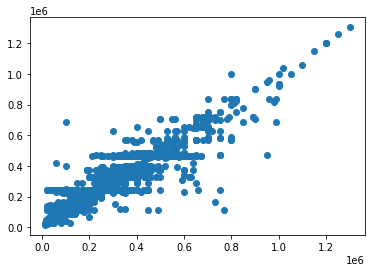

In [43]:
'''예측 결과  scatter plot'''
# 테스트 데이터의 y 값과, 예측된 y값을 scatter plot을 활용하여 상관관계를 살펴봅니다.
plt.scatter(y_test.values, y_test_pred)